# SYDE 556/750 --- Assignment 2


In [41]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Used this for Question 5
from scipy.special import gamma

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise


In [42]:
def generate_limit_signal(T, dt, rms, limit, seed):
    np.random.seed(seed)
    
    N = int(T / dt)
    f = np.fft.fftfreq(N, dt)

    X = np.zeros(N, dtype=complex)

    # Fill in X(w) samples for given frequency limit
    for i in range(N):
        if abs(f[i]) <= limit:
            # Randomly generate Fourier coefficients from normal distribution
            a = np.random.normal(0, 1)
            b = np.random.normal(0, 1)
            X[i] = a + b * 1j

    # Ensuring Hermitian symmetry for inverse fourier transform will ensure time signal is purely real
    X[N // 2 + 1:] = np.conj(X[1:N // 2][::-1])

    x = np.fft.ifft(X).real

    # Scale to desired RMS from current RMS
    scale = rms / np.sqrt(np.mean(x ** 2))
    x *= scale
    X = np.fft.fft(x)
    
    return x, X

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.


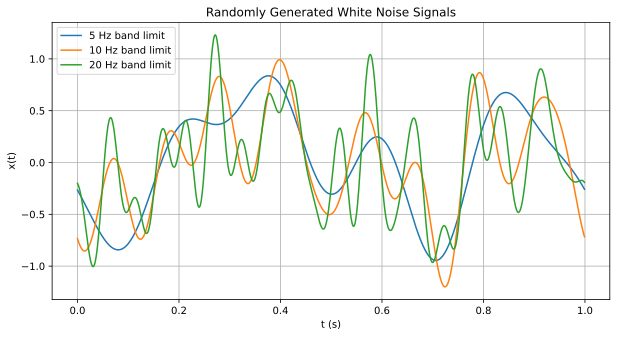

In [43]:
T = 1
dt = 0.001
rms = 0.5

x_5, _ = generate_limit_signal(T, dt, rms, limit=5, seed=4673)
x_10, _ = generate_limit_signal(T, dt, rms, limit=10, seed=4673)
x_20, _ = generate_limit_signal(T, dt, rms, limit=20, seed=4673)

t = np.arange(0, T, dt)

plt.figure(figsize=(10,5))
plt.plot(t, x_5, label='5 Hz band limit')
plt.plot(t, x_10, label='10 Hz band limit')
plt.plot(t, x_20, label='20 Hz band limit')

plt.title('Randomly Generated White Noise Signals')
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.


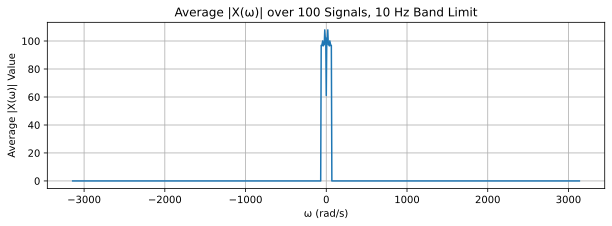

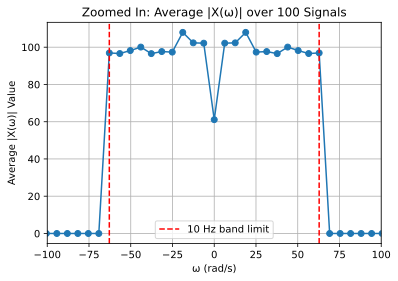

In [44]:
n_signals = 100

T = 1
dt = 0.001
rms = 0.5
limit = 10

N = int(T / dt)

pow_spectrum = np.zeros(N)

# Generate 100 signals
for i in range(n_signals):
    _, X_10 = generate_limit_signal(T, dt, rms, limit, seed=i)
    X_norm = np.abs(X_10)

    # Add |X(w)| for each signal to power spectrum
    pow_spectrum += X_norm

# Take average of power spectrum
pow_spectrum /= n_signals
power_spectrum = np.fft.fftshift(pow_spectrum)

# Get corresponding angular frequency, rad/s
w = np.fft.fftfreq(N, dt) * 2 * np.pi
w = np.fft.fftshift(w)

# Plot avg. power spectrum for all w
plt.figure(figsize=(10,3))
plt.plot(w, power_spectrum)
plt.title('Average |X(ω)| over 100 Signals, 10 Hz Band Limit')
plt.xlabel('ω (rad/s)')
plt.ylabel('Average |X(ω)| Value')
plt.grid(True)
plt.show()

# Plotting a zoomed in version to demonstrate 10 Hz limit
plt.figure(figsize=(6,4))
plt.plot(w, power_spectrum, marker='o')
plt.xlim([-100,100])
# Plot 10 Hz frequency cutoff (+= 10*2*pi rad/s)
plt.axvline(x=-10 * 2 * np.pi, color='red', linestyle='--', label='10 Hz band limit')
plt.axvline(x=10 * 2 * np.pi, color='red', linestyle='--')
plt.title('Zoomed In: Average |X(ω)| over 100 Signals')
plt.xlabel('ω (rad/s)')
plt.ylabel('Average |X(ω)| Value')
plt.legend()
plt.grid(True)
plt.show()

## 1.2 Gaussian power spectrum noise


In [45]:
def generate_bandwidth_signal(T, dt, rms, bandwidth, seed):
    np.random.seed(seed)
    
    N = int(T / dt)
    f = np.fft.fftfreq(N, dt)

    X = np.zeros(N, dtype=complex)

    # Fill in X(w) samples
    for i in range(N):
        sigma = np.exp(-f[i]**2 / (2 * (bandwidth)**2))

        # Coefficients now sampled from new Gaussian decay distribution
        a = np.random.normal(0, sigma)
        b = np.random.normal(0, sigma)
        X[i] = a + b * 1j

    # Ensuring Hermitian symmetry for inverse fourier transform will ensure time signal is purely real
    X[N // 2 + 1:] = np.conj(X[1:N // 2][::-1])
    
    x = np.fft.ifft(X).real

    # Scale to desired RMS from current RMS
    scale = rms / np.sqrt(np.mean(x ** 2))
    x *= scale
    X = np.fft.fft(x)

    return x, X

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.


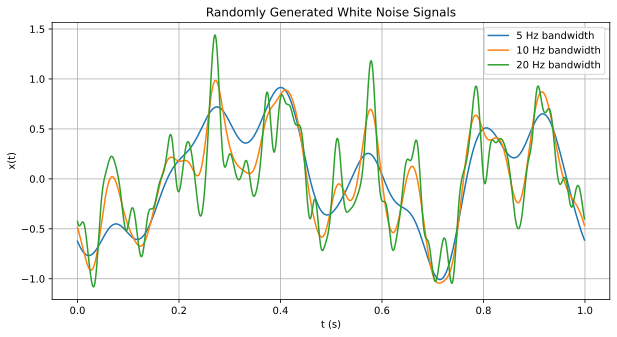

In [46]:
T = 1
dt = 0.001
rms = 0.5

x_5, _ = generate_bandwidth_signal(T, dt, rms, bandwidth=5, seed=4673)
x_10, _ = generate_bandwidth_signal(T, dt, rms, bandwidth=10, seed=4673)
x_20, _ = generate_bandwidth_signal(T, dt, rms, bandwidth=20, seed=4673)

t = np.arange(0, T, dt)

plt.figure(figsize=(10,5))
plt.plot(t, x_5, label='5 Hz bandwidth')
plt.plot(t, x_10, label='10 Hz bandwidth')
plt.plot(t, x_20, label='20 Hz bandwidth')

plt.title('Randomly Generated White Noise Signals')
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.


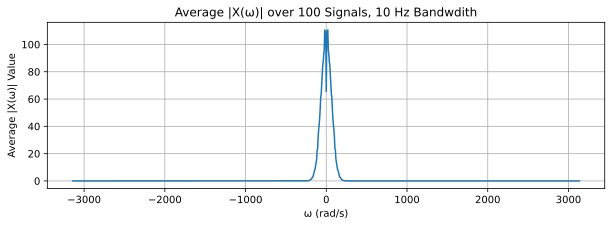

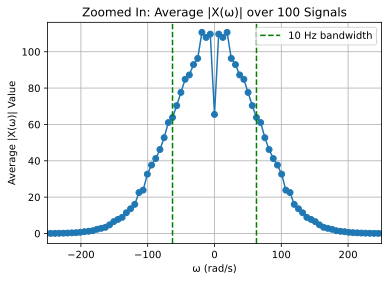

In [47]:
n_signals = 100

T = 1
dt = 0.001
rms = 0.5
bandwidth = 10

N = int(T / dt)

pow_spectrum = np.zeros(N)

# Generate 100 signals
for i in range(n_signals):
    _, X_10 = generate_bandwidth_signal(T, dt, rms, bandwidth, seed=i)
    X_norm = np.abs(X_10)

    # Add |X(w)| for each signal to power spectrum
    pow_spectrum += X_norm

# Take average of power spectrum
pow_spectrum /= n_signals
power_spectrum = np.fft.fftshift(pow_spectrum)

# Get corresponding angular frequency, rad/s
w = np.fft.fftfreq(N, dt) * 2 * np.pi
w = np.fft.fftshift(w)

# Plot avg. power spectrum for all w
plt.figure(figsize=(10,3))
plt.plot(w, power_spectrum)
plt.title('Average |X(ω)| over 100 Signals, 10 Hz Bandwdith')
plt.xlabel('ω (rad/s)')
plt.ylabel('Average |X(ω)| Value')
plt.grid(True)
plt.show()

# Plotting a zoomed in version
plt.figure(figsize=(6,4))
plt.plot(w, power_spectrum, marker='o')
plt.xlim([-250,250])
# Showing bandwidth value for reference
plt.axvline(x=-10 * 2 * np.pi, color='green', linestyle='--', label='10 Hz bandwidth')
plt.axvline(x=10 * 2 * np.pi, color='green', linestyle='--')
plt.title('Zoomed In: Average |X(ω)| over 100 Signals')
plt.xlabel('ω (rad/s)')
plt.ylabel('Average |X(ω)| Value')
plt.legend()
plt.grid(True)
plt.show()

# 2. Simulating a spiking neuron


Given the LIF rate approximation used in Assignment 1, Question 1.3:

$$
G[J] = \frac{1}{\tau_{\text{ref}} - \tau_{\text{RC}} \ln\left(1 - \frac{1}{J}\right)} \tag{1}
$$

Based on the model specifications, we want to find equations for $\alpha$ and $J_{\text{bias}}$ such that if the encoder is set to $e=1$, an input of $x=0$ gives a firing rate of 40Hz, and an input of $x=1$ gives a firing rate of 150Hz.

Start by solving equation $(1)$ for $J$. Re-arranging gives us:

$$
J = \frac{1}{1 - e^{\left( \frac{\tau_{\text{ref}} - \frac{1}{G[J]}}{\tau_{\text{RC}}} \right)}}
$$

Then, substitute the encoder equation for $J$. This means that for some $e$, $x$, and desired firing rate $G[J]$:

$$
\alpha \langle \mathbf{e}, \mathbf{x} \rangle + J_{\text{bias}} = \frac{1}{1 - e^{\left( \frac{\tau_{\text{ref}} - \frac{1}{G[J]}}{\tau_{\text{RC}}} \right)}}
$$

Now, derive the equations by substituting the values from both of our desired cases.

First, we have $e=1$, $x=0$, and $G[J]$= 40Hz. In this case, $\langle \mathbf{e}, \mathbf{x} \rangle$ = 0, so we're left with:

$$
J_{\text{bias}} = \frac{1}{1 - e^{\left( \frac{\tau_{\text{ref}} - \frac{1}{40}}{\tau_{\text{RC}}} \right)}} \tag{2}
$$

Next, we have $e=1$, $x=1$, and $G[J]$= 150Hz. In this case, $\langle \mathbf{e}, \mathbf{x} \rangle$ = 1, so we get:

$$
\alpha = \frac{1}{1 - e^{\left( \frac{\tau_{\text{ref}} - \frac{1}{150}}{\tau_{\text{RC}}} \right)}} - J_{\text{bias}} \tag{3}
$$


In [48]:
# J for one neuron, based on equations (2) and (3) derived above
def J(t_ref, t_RC, a_0, a_1, e, x):
    J_bias = 1 / (1 - np.exp((t_ref - (1 / a_0)) / t_RC))
    alpha = 1 / (1 - np.exp((t_ref - (1 / a_1)) / t_RC)) - J_bias

    J = alpha * np.dot(e, x) + J_bias

    return J

# For solving dv/dt
def dv_dt(T, dt, J_input, v_th, t_ref, t_RC):
    v_vals = []  # to record v over time

    t_spikes = []  # to record spike times
    v_spikes = []  # to record v reached at spikes, just for plotting

    t = 0  # current time
    v = 0  # current v

    time_steps = int(T/dt)

    refractory_time = 0  # track time spent in refractory period

    # Euler's method: loop through time span getting v by incrementing previous v using dv
    for i in range(time_steps):
        # set v to zero while in refractory period
        if refractory_time > 0:
            v = 0
            refractory_time -= dt
        else:
            dv = (1 / t_RC) * (J_input[i] - v)
            v += dv * dt

            # Enforce v=0
            if v < 0:
                v = 0

            # if spiked, record time & enter refractory period
            if v >= v_th:
                t_spikes.append(t)
                v_spikes.append(v)
                refractory_time = t_ref
        
        v_vals.append(v)
        t += dt
    
    # Return values for plotting, spike times
    return v_vals, t_spikes, v_spikes


**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.


Number of spikes for x=0: 40


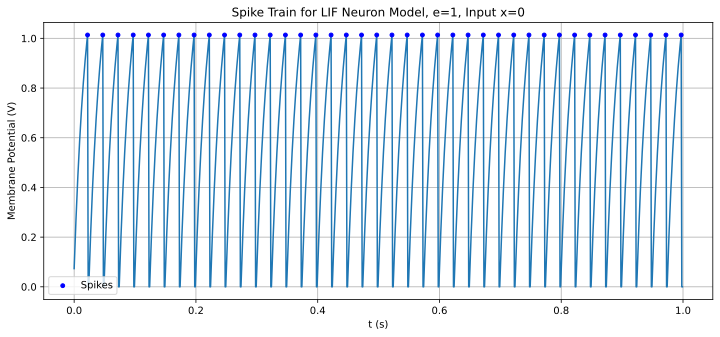

In [49]:
# Constants for given neuron:
t_ref = 0.002
t_RC = 0.02
a_0 = 40
a_1 = 150
v_th = 1.0 

# Time steps
T = 1.0
dt = 0.001

# Encoder
e = 1

# For x = 0:
x = np.zeros(int(T/dt))
J_input = J(t_ref, t_RC, a_0, a_1, e, x)

v_vals, t_spikes, v_spikes = dv_dt(T, dt, J_input, v_th, t_ref, t_RC)
print(f"Number of spikes for x=0: {len(t_spikes)}")

plt.figure(figsize=(12,5))
plt.plot(np.arange(0, T, dt), v_vals)
plt.scatter(t_spikes, v_spikes, color='blue', label='Spikes', s=15, zorder=2)
plt.title(f'Spike Train for LIF Neuron Model, e=1, Input x=0')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)
plt.show()


Number of spikes for x=1: 143


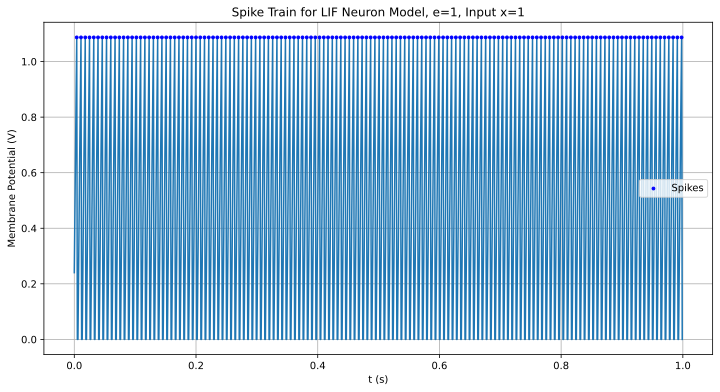

In [50]:
# For x = 1:
x = np.ones(int(T/dt))
J_input = J(t_ref, t_RC, a_0, a_1, e, x)

v_vals, t_spikes, v_spikes = dv_dt(T, dt, J_input, v_th, t_ref, t_RC)
print(f"Number of spikes for x=1: {len(t_spikes)}")

plt.figure(figsize=(12,6))
plt.plot(np.arange(0, T, dt), v_vals)
plt.scatter(t_spikes, v_spikes, label='Spikes', color='blue', s=8, zorder=2)
plt.title(f'Spike Train for LIF Neuron Model, e=1, Input x=1')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)
plt.show()

**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?


We defined $\alpha$ and $J_{bias}$ such that the firing rate would be 40Hz when $x=0$, and 150Hz when $x=1$.

In our simulation, we see 40 spikes when $x=0$, which is expected, but only 143 spikes when $x=1$. This is because we're using Euler's method with discrete time steps to solve our differential equation. We're approximating the value of $v$ every 0.001 seconds.

When $x=0$, calculating approximate $v$ values every 0.001 seconds is enough to capture when the spikes occur, because the spikes are more spread out throughout our 1-second time window.

For $x=1$, because we have far more spikes occurring within our time window, they might be happening _in between_ the discrete 0.001-second time steps, so we fail to capture some of them when we approximate $v$. If we made our time step smaller, Euler's method would get more accurate, and we'd get closer to the continuous solution of our differential equation, and closer to the 150 spikes we expect when $x=1$.


**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.


Number of spikes for random 30Hz-limited input signal: 39


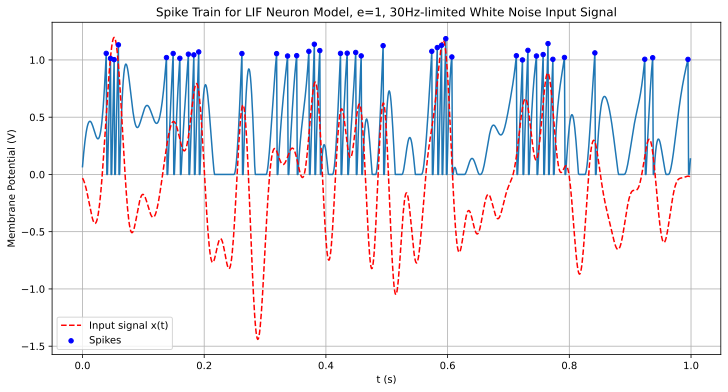

In [51]:
x, _ = generate_limit_signal(T, dt, rms=0.5, limit=30, seed=243879)

# New x, other values reused
J_input = J(t_ref, t_RC, a_0, a_1, e, x)

v_vals, t_spikes, v_spikes = dv_dt(T, dt, J_input, v_th, t_ref, t_RC)
print(f"Number of spikes for random 30Hz-limited input signal: {len(t_spikes)}")

# Plot potential over time and x overlay
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, T, dt), v_vals)
plt.plot(np.arange(0, T, dt), x, label='Input signal x(t)', color='red', linestyle='--')
plt.scatter(t_spikes, v_spikes, label='Spikes', color='blue', s=20, zorder=2)
plt.title(f'Spike Train for LIF Neuron Model, e=1, 30Hz-limited White Noise Input Signal')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)
plt.show()


**d) Voltage over time.** Using the same $x(t)$ signal as in part _c)_, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.


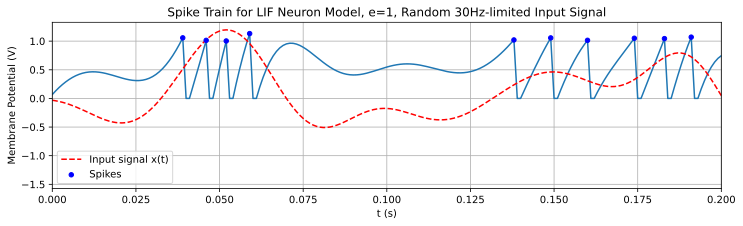

In [52]:
# Same plot (voltage over time) clipped to 0.2 seconds
plt.figure(figsize=(12,3))
plt.plot(np.arange(0, T, dt), v_vals)
plt.plot(np.arange(0, T, dt), x, label='Input signal x(t)', color='red', linestyle='--')
plt.scatter(t_spikes, v_spikes, label='Spikes', color='blue', s=20, zorder=2)
plt.xlim([0,0.2])
plt.title(f'Spike Train for LIF Neuron Model, e=1, Random 30Hz-limited Input Signal')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)
plt.show()

**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.


We just saw that a significant source of innaccuray in our simulation is the fact that we're using Euler's method to approximate $v$, with time steps of 0.001 seconds. If we decreased the time step by 1 or 2 orders of magnitude, we'd start to see some improvements in accuracy, but the simulation would also be noticeably slower.

To maintain a similar computation time, we could improve accuracy by using a better numerical method to solve the differential equation. We could use the Runge-Kutta 4th Order Method (RK4) instead of Euler's method to approximate $v$ at each time step.

Euler's is a 1st order method, meaning that it evaluates the derivative only once per time step to estimate $v$. RK4 is a 4th order method, meaning that it does 4 evaluations of the derivative at each time step, and uses a weighted average of these derivative evaluations to estimate $v$. Because of this, with RK4, we can use the same time step value while also reducing the error of the evaluations at each time step.

Below is an implementation of dv/dt using RK4, and a graph comparing Euler's vs. RK4 for evaluating the response to the 30Hz-limited signal from the previous question.

The runtime does not change much using RK4 and dt=0.001, staying at 0.0s. The resulting graph shows that because RK4 uses a weighted average for derivatives, it tends to not overestimate the values of spikes and peaks as much as Euler's method does, and because of this, it also might do better at handling situations where we have multiple spikes happening quickly a row.


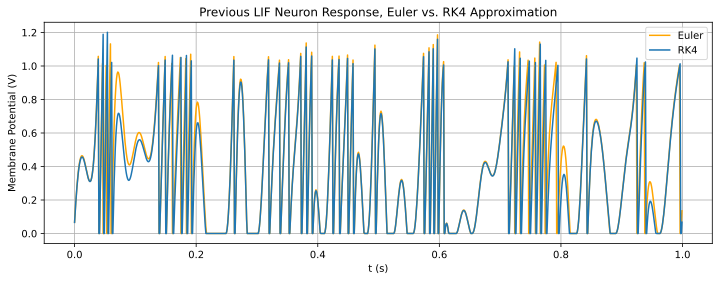

In [53]:
# dv/dt implemented with RK4
def dv_dt_rk4(T, dt, J_input, v_th, t_ref, t_RC):
    v_vals = [] 

    t = 0
    v = 0 

    time_steps = int(T/dt)

    refractory_time = 0 

    # RK4 method: use 4 evaluations per step to approximate v, everything else is the same
    for i in range(time_steps):
        if refractory_time > 0:
            v = 0
            refractory_time -= dt
        else:
            J = J_input[i]
            
            def f(v, J):
                return (1 / t_RC) * (J - v)
            
            # RK4 evaluations
            k1 = dt * f(v, J)
            k2 = dt * f(v + k1 / 2, J)
            k3 = dt * f(v + k2 / 2, J)
            k4 = dt * f(v + k3, J)

            # update the membrane potential using the 4 evaluations!!
            v += (k1 + 2*k2 + 2*k3 + k4) / 6

            if v < 0:
                v = 0

            if v >= v_th:
                refractory_time = t_ref

        v_vals.append(v)
        t += dt

    return v_vals

# Use same values, for both Euler & RK4 approximations of dv/dt
v_vals, _, _ = dv_dt(T, dt, J_input, v_th, t_ref, t_RC)
v_vals_rk4 = dv_dt_rk4(T, dt, J_input, v_th, t_ref, t_RC)

# Plot both for comparison
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, T, dt), v_vals, color="orange",label="Euler")
plt.plot(np.arange(0, T, dt), v_vals_rk4, label="RK4")

plt.title(f'Previous LIF Neuron Response, Euler vs. RK4 Approximation')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Simulating two spiking neurons


In [54]:
# Re-declaring all the model variables

# Constants for given neuron:
t_ref = 0.002
t_RC = 0.02
a_0 = 40
a_1 = 150
v_th = 1.0 

# Time steps
T = 1.0
dt = 0.001

# Encoders for two neurons
e_1 = 1
e_2 = -1

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).


Number of spikes for Neuron 1: 40
Number of spikes for Neuron 2: 40


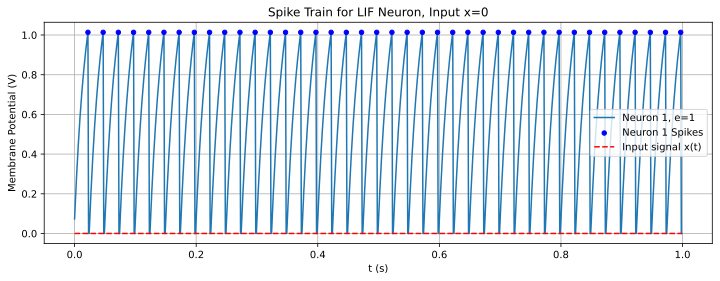

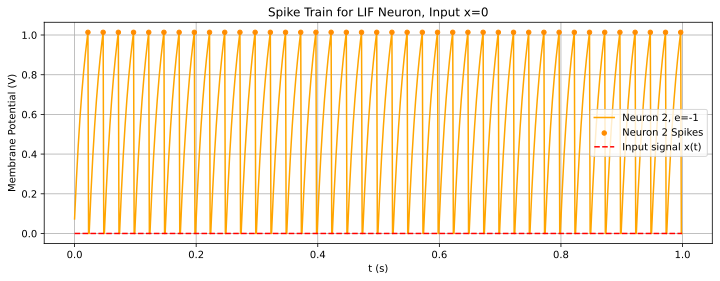

In [55]:
# x(t) = 0
x = np.zeros(int(T/dt))

J_input_1 = J(t_ref, t_RC, a_0, a_1, e_1, x)
J_input_2 = J(t_ref, t_RC, a_0, a_1, e_2, x)

v_vals_1, t_spikes_1, v_spikes_1 = dv_dt(T, dt, J_input_1, v_th, t_ref, t_RC)
v_vals_2, t_spikes_2, v_spikes_2 = dv_dt(T, dt, J_input_2, v_th, t_ref, t_RC)

print(f'Number of spikes for Neuron 1: {len(t_spikes_1)}')
print(f'Number of spikes for Neuron 2: {len(t_spikes_2)}')

plt.figure(figsize=(12,4))
plt.plot(np.arange(0, T, dt), v_vals_1, label='Neuron 1, e=1')
plt.scatter(t_spikes_1, v_spikes_1, label='Neuron 1 Spikes', color='blue', s=20, zorder=2)
plt.plot(np.arange(0, T, dt), x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, Input x=0')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12,4))
plt.plot(np.arange(0, T, dt), v_vals_2, color='orange', label='Neuron 2, e=-1')
plt.scatter(t_spikes_2, v_spikes_2, label='Neuron 2 Spikes', color='darkorange', s=20, zorder=2)
plt.plot(np.arange(0, T, dt), x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, Input x=0')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)

plt.show()



Number of spikes for Neuron 1: 143
Number of spikes for Neuron 2: 0


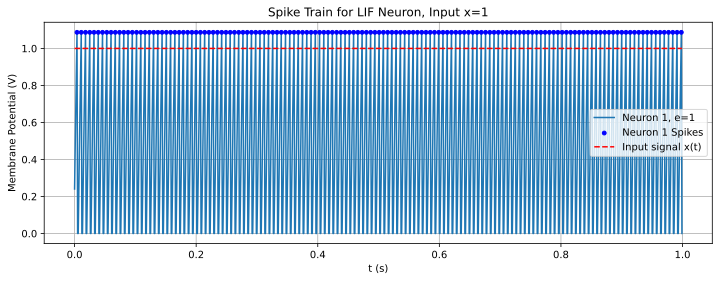

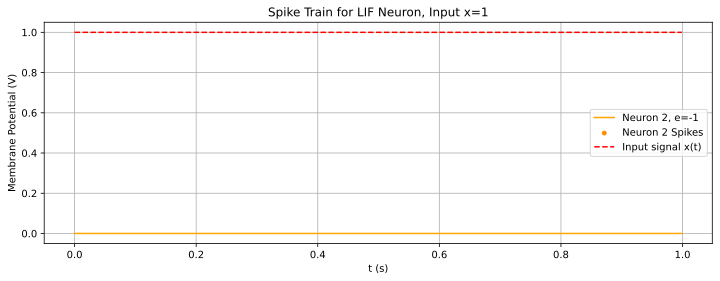

In [56]:
# x(t) = 1
x = np.ones(int(T/dt))

J_input_1 = J(t_ref, t_RC, a_0, a_1, e_1, x)
J_input_2 = J(t_ref, t_RC, a_0, a_1, e_2, x)

v_vals_1, t_spikes_1, v_spikes_1 = dv_dt(T, dt, J_input_1, v_th, t_ref, t_RC)
v_vals_2, t_spikes_2, v_spikes_2 = dv_dt(T, dt, J_input_2, v_th, t_ref, t_RC)

print(f'Number of spikes for Neuron 1: {len(t_spikes_1)}')
print(f'Number of spikes for Neuron 2: {len(t_spikes_2)}')

plt.figure(figsize=(12,4))
plt.plot(np.arange(0, T, dt), v_vals_1, label='Neuron 1, e=1')
plt.scatter(t_spikes_1, v_spikes_1, label='Neuron 1 Spikes', color='blue', s=15, zorder=2)
plt.plot(np.arange(0, T, dt), x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, Input x=1')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12,4))
plt.plot(np.arange(0, T, dt), v_vals_2, color='orange', label='Neuron 2, e=-1')
plt.scatter(t_spikes_2, v_spikes_2, label="Neuron 2 Spikes", color='darkorange', s=15)
plt.plot(np.arange(0, T, dt), x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, Input x=1')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)

plt.show()

**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.


Number of spikes for Neuron 1: 40
Number of spikes for Neuron 2: 40


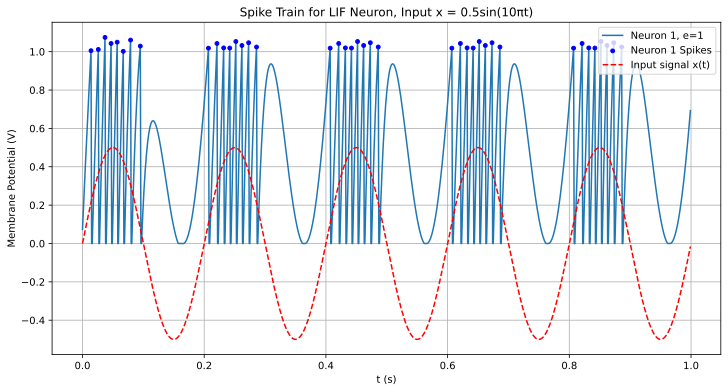

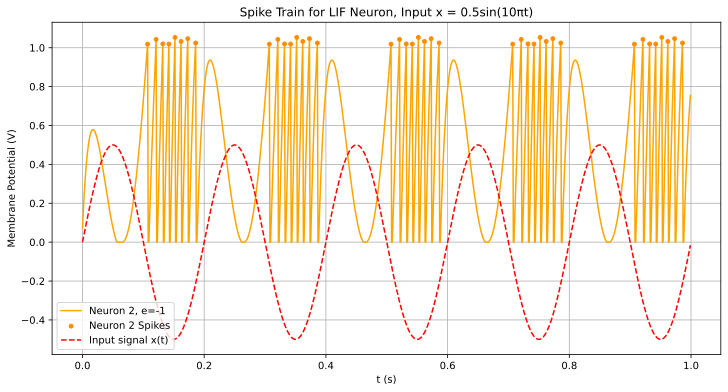

In [57]:
t = np.arange(0, T, dt)

x = 0.5 * np.sin(10 * np.pi * t)

J_input_1 = J(t_ref, t_RC, a_0, a_1, e_1, x)
J_input_2 = J(t_ref, t_RC, a_0, a_1, e_2, x)

v_vals_1, t_spikes_1, v_spikes_1 = dv_dt(T, dt, J_input_1, v_th, t_ref, t_RC)
v_vals_2, t_spikes_2, v_spikes_2 = dv_dt(T, dt, J_input_2, v_th, t_ref, t_RC)

print(f'Number of spikes for Neuron 1: {len(t_spikes_1)}')
print(f'Number of spikes for Neuron 2: {len(t_spikes_2)}')

plt.figure(figsize=(12,6))
plt.plot(t, v_vals_1, label='Neuron 1, e=1')
plt.scatter(t_spikes_1, v_spikes_1, label='Neuron 1 Spikes', color='blue', s=15, zorder=2)
plt.plot(t, x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, Input x = 0.5sin(10πt)')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12,6))
plt.plot(t, v_vals_2, color='orange', label='Neuron 2, e=-1')
plt.scatter(t_spikes_2, v_spikes_2, label='Neuron 2 Spikes', color='darkorange', s=15, zorder=2)
plt.plot(t, x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, Input x = 0.5sin(10πt)')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend(loc='lower left')
plt.grid(True)

plt.show()

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.


Number of spikes for Neuron 1: 83
Number of spikes for Neuron 2: 101


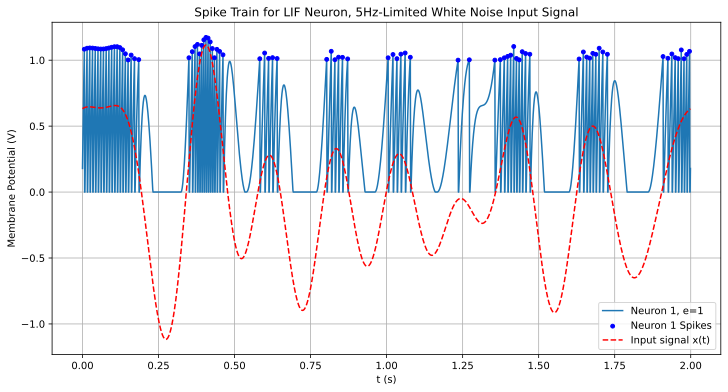

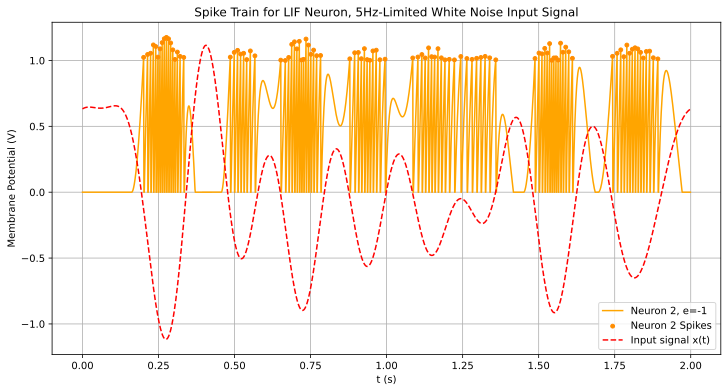

In [58]:
T = 2.0
dt = 0.001
t = np.arange(0, T, dt)

x, X = generate_limit_signal(T, dt, rms=0.5, limit=5, seed=437856)

J_input_1 = J(t_ref, t_RC, a_0, a_1, e_1, x)
J_input_2 = J(t_ref, t_RC, a_0, a_1, e_2, x)

v_vals_1, t_spikes_1, v_spikes_1 = dv_dt(T, dt, J_input_1, v_th, t_ref, t_RC)
v_vals_2, t_spikes_2, v_spikes_2 = dv_dt(T, dt, J_input_2, v_th, t_ref, t_RC)

print(f'Number of spikes for Neuron 1: {len(t_spikes_1)}')
print(f'Number of spikes for Neuron 2: {len(t_spikes_2)}')

plt.figure(figsize=(12,6))
plt.plot(t, v_vals_1, label='Neuron 1, e=1')
plt.scatter(t_spikes_1, v_spikes_1, label='Neuron 1 Spikes', color='blue', s=15, zorder=2)
plt.plot(t, x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, 5Hz-Limited White Noise Input Signal')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12,6))
plt.plot(t, v_vals_2, color='orange', label='Neuron 2, e=-1')
plt.scatter(t_spikes_2, v_spikes_2, label='Neuron 2 Spikes', color='darkorange', s=15, zorder=2)
plt.plot(t, x, label='Input signal x(t)', color='red', linestyle='--')
plt.title(f'Spike Train for LIF Neuron, 5Hz-Limited White Noise Input Signal')
plt.xlabel('t (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.grid(True)

plt.show()

# 4. Computing an optimal filter


**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).


In [59]:
def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # Number of time samples we're working with given by number of samples in white noise signal x(t)
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    # "Spikes" will contain the spike trains for two neurons, positive and negative, each containing the same number of samples as input x(t)
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt

    # Total time span covered by input signals and spikes, in seconds
    T = Nt * dt

    # Array of time values spanning T seconds, time step between samples is dt
    ts = np.arange(Nt) * dt

    # Array of frequency values corresponding to each time sample, centered at 0
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # Convert array of frequencies to angular frequency in rad/s, by multiplying by 2*pi
    omega = fs * 2.0 * np.pi

    # r is the difference between the spike trains of the two neurons
    # One neuron will represent the positive side of the signal, other will represent the negative side
    # So we're aiming to use the difference, r, to decode the original signal x(t)
    r = spikes[0] - spikes[1]

    # Converting the difference between spike trains to the frequency domain, by taking Fourier transform, then centering back at 0
    R = np.fft.fftshift(np.fft.fft(r))

    # Standard deviation (spread) of Gaussian filter, i.e. desired extent of smoothing
    # Defined in time domain so it's more intuitive. Narrower window in time will correspond to wider window of smoothing in freq domain
    sigma_t = 25e-3

    # Define a Gaussian filter, W2, that acts in the frequency domain
    # For large frequencies (omega), exp term is small. For small omega, exp term is larger. Therefore filters out large frequencies/noise
    W2 = np.exp(-omega**2*sigma_t**2)

    # Normalize the filter weights by dividing by their sum, so that filtering preserves original scale of values
    W2 = W2 / sum(W2)

    # This is the cross power spectrum between input signal X, and spike train difference R
    # Multiplying X by R_conj measures alignment of magnitude and phase of each signal, giving a measure of how well the two signals correlate
    CP = X*R.conjugate()

    # Apply the Gaussian smoothing filter to the cross power spectrum. This filters out any high-frequency noise
    WCP = np.convolve(CP, W2, 'same')

    # This is the power spectrum of R. Indicates the total energy of the spike train difference at each frequency value, i.e. how the signal varies over frequencies
    RP = R*R.conjugate()

    # Apply the Gaussian smoothing filter to the power spectrum for R. This filters out any high-frequency noise
    WRP = np.convolve(RP, W2, 'same')

    # Power spectrum of input X. Indicates total energy of input signal at each frequency value, i.e. how the signal varies over frequencies
    XP = X*X.conjugate()

    # Apply the Gaussian smoothing filter to the power spectrum for X. This filters out any high-frequency noise
    WXP = np.convolve(XP, W2, 'same')

    # Optimal filter H is given by WCP / WRP.
    # This will give a filter with weights that emphasize frequency values where the input signal, X, and spike train differences, R, are highly correlated
    # And de-emphasize values where the correlation between them is low
    H = WCP / WRP

    # Inverse fourier to get the optimal filter in time domain, centered back at 0
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # Estimate for input signal X(w), which is given by the optimal filter H applied to the spike train difference R
    XHAT = H*R

    # Estimate for x(t) in time domain given by inverse fourier on X(w)
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP

Making a helper to build spike trains for two neurons, given a time range, and spike times for each neuron.


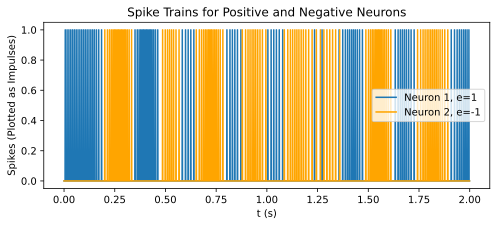

In [60]:
def get_spike_trains(t, t_spikes_1, t_spikes_2):
    spikes_1 = np.zeros_like(t)
    spikes_2 = np.zeros_like(t)

    for t_spike in t_spikes_1:
        # Add a small tolerance for floating point error when placing spike times in t
        spike_idx = np.where(np.isclose(t, t_spike, atol=dt/2))[0]
        if len(spike_idx) > 0:
            spikes_1[spike_idx[0]] = 1 

    for t_spike in t_spikes_2:
        spike_idx = np.where(np.isclose(t, t_spike, atol=dt/2))[0]
        if len(spike_idx) > 0:
            spikes_2[spike_idx[0]] = 1

    return np.array([spikes_1, spikes_2])

spikes = get_spike_trains(t, t_spikes_1, t_spikes_2)

plt.figure(figsize=(8,3))
plt.title('Spike Trains for Positive and Negative Neurons')
plt.plot(t, spikes[0], label='Neuron 1, e=1')
plt.plot(t, spikes[1], color='orange', label='Neuron 2, e=-1')
plt.xlabel('t (s)')
plt.ylabel('Spikes (Plotted as Impulses)')
plt.legend()
plt.show()

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.


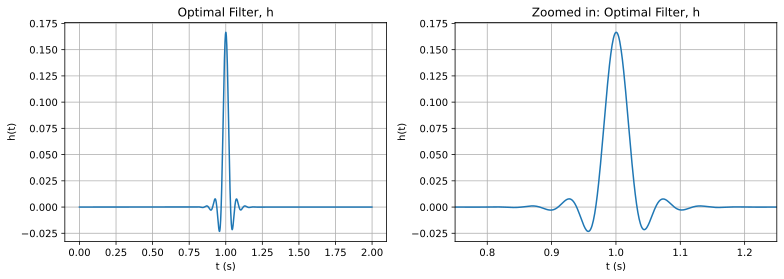

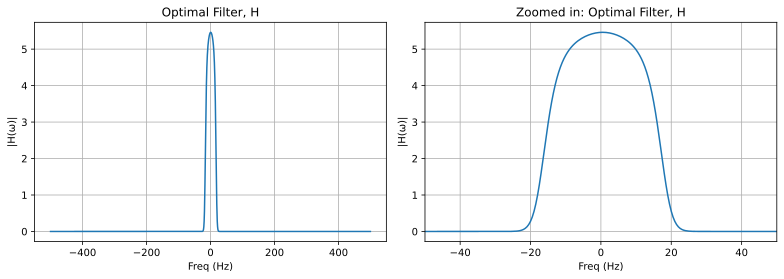

In [61]:
# Uses x and X from 3c), shift X to be centered at 0, to match fs in compute_optimal_filter
ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(x, np.fft.ifftshift(X), spikes, dt)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Plot h
ax1.plot(ts, h)
ax1.set_title("Optimal Filter, h")
ax1.set_xlabel("t (s)")
ax1.set_ylabel("h(t)")
ax1.grid(True)

# Plot h zoomed
ax2.plot(ts, h)
ax2.set_title("Zoomed in: Optimal Filter, h")
ax2.set_xlim([0.75, 1.25])
ax2.set_xlabel("t (s)")
ax2.set_ylabel("h(t)")
ax2.grid(True)

plt.tight_layout()
plt.show()

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 4))

# Plot H 
ax3.plot(fs, abs(H))
ax3.set_title("Optimal Filter, H")
ax3.set_xlabel("Freq (Hz)")
ax3.set_ylabel("|H(ω)|")
ax3.grid(True)

# Plot H zoomed
ax4.plot(fs, abs(H))
ax4.set_title("Zoomed in: Optimal Filter, H")
ax4.set_xlim([-50, 50])
ax4.set_xlabel("Freq (Hz)")
ax4.set_ylabel("|H(ω)|")
ax4.grid(True)

# Show the H plots side by side
plt.tight_layout()
plt.show()

**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).


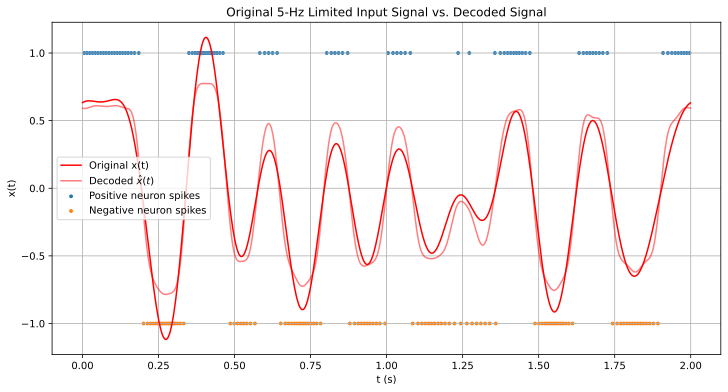

In [62]:
plt.figure(figsize=(12,6))
plt.plot(ts, x, label='Original x(t)', color='red')
plt.plot(ts, xhat, label='Decoded $\hat{x}(t)$', color='red', alpha=0.5)

# Plot spikes like in fig. 4.9
plt.scatter(ts[spikes[0] == 1], spikes[0][spikes[0] == 1], label='Positive neuron spikes', s=8)
plt.scatter(ts[spikes[1] == 1], -1 * spikes[1][spikes[1] == 1], label='Negative neuron spikes', s=8)

plt.title('Original 5-Hz Limited Input Signal vs. Decoded Signal')
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).


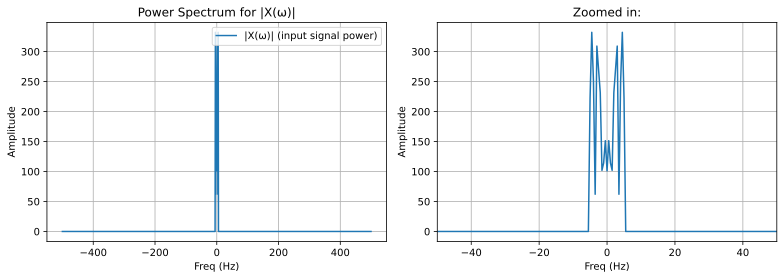

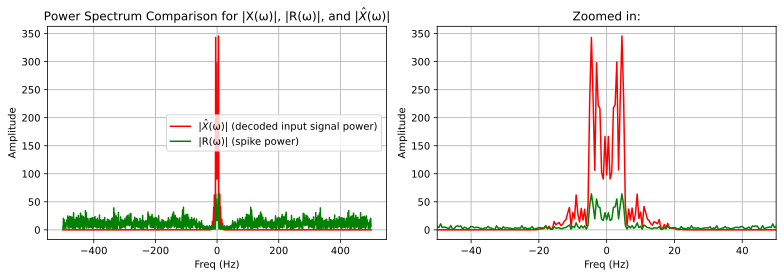

In [63]:
# Plot X(w) from 3c

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

ax1.plot(fs, abs(np.fft.fftshift(X)), label='|X(ω)| (input signal power)')
ax1.set_title("Power Spectrum for |X(ω)|")
ax1.set_xlabel("Freq (Hz)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)
ax1.legend()

ax2.plot(fs, abs(np.fft.fftshift(X)), label='|X(ω)| (input signal power)')
ax2.set_title("Zoomed in:")
ax2.set_xlabel("Freq (Hz)")
ax2.set_xlim([-50,50])
ax2.set_ylabel("Amplitude")
ax2.grid(True)

plt.tight_layout()
plt.show()


# Plot decoded X(w) and R comparison, obtained from 3c input signal

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 4))

ax3.plot(fs, abs(XHAT), label='|$\hat{X}$(ω)| (decoded input signal power)', color='red')
ax3.plot(fs, abs(R), label='|R(ω)| (spike power)', color='green')
ax3.set_title("Power Spectrum Comparison for |X(ω)|, |R(ω)|, and |$\hat{X}$(ω)|")
ax3.set_xlabel("Freq (Hz)")
ax3.set_ylabel("Amplitude")
ax3.grid(True)
ax3.legend()

ax4.plot(fs, abs(XHAT), label='|$\hat{X}$(ω)| (decoded input signal power)', color='red')
ax4.plot(fs, abs(R), label='|R(ω)| (spike power)', color='green')
ax4.set_title("Zoomed in:")
ax4.set_xlim([-50,50])
ax4.set_xlabel("Freq (Hz)")
ax4.set_ylabel("Amplitude")
ax4.grid(True)

plt.tight_layout()
plt.show()


**e) Discussion.** How do these spectra relate to the optimal filter?


From question 4a), we designed the optimal filter $H$ such that applying it to $R$ would preserve the parts of $R$ that correspond the most to the input signal $X$, and smooth out any unwanted noise (i.e. parts of $R$ that do not correspond strongly with $X$).

In the full plot for $R$, we can see that there's a large amount of unwanted noise from -400Hz to 400Hz, which calms down closer to 0Hz. Around 0Hz, the general shape of $R$'s power spectrum is quite similar to the shape of $X$'s, despite $R$ being overall lower in amplitude. This shape similarity is captured in our optimal filter, because when we calculated the cross-correlation between these signals, we measured the degree of their alignment based on the alignment of their phases & frequencies.

In the resulting $\hat{X}$, we can see that we've maintained the parts of $R$ that aligned closest with the structure of $X$. There's a little bit of noise preserved around -20Hz to 20Hz near the cutoff limit, because $H$ was designed to balance preserving the original signal with eliminating noise. Because the frequencies of $R$ were relatively low in this range, some of the noise ended up correlating with $X$. Otherwise, $H$ managed to completely smooth out the rest of the noise from $R$.


**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.


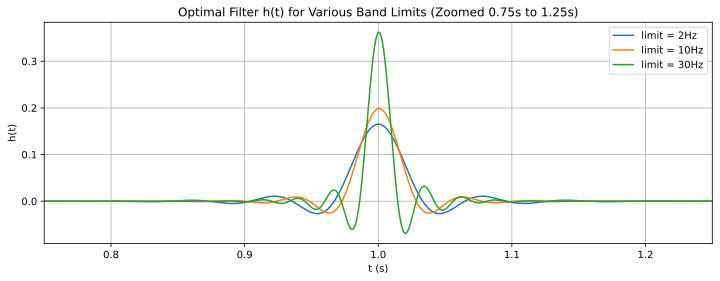

In [64]:
x_2, X_2 = generate_limit_signal(T, dt, rms=0.5, limit=2, seed=123)
x_10, X_10 = generate_limit_signal(T, dt, rms=0.5, limit=10, seed=123)
x_30, X_30 = generate_limit_signal(T, dt, rms=0.5, limit=30, seed=123)

signals = [
    (x_2, X_2, 2),
    (x_10, X_10, 10),
    (x_30, X_30, 30)
]

plt.figure(figsize=(12,4))
plt.title('Optimal Filter h(t) for Various Band Limits (Zoomed 0.75s to 1.25s)')
plt.xlabel('t (s)')
plt.ylabel('h(t)')

for x, X, limit in signals:
    J_input_1 = J(t_ref, t_RC, a_0, a_1, e_1, x)
    J_input_2 = J(t_ref, t_RC, a_0, a_1, e_2, x)

    _, t_spikes_1, _ = dv_dt(T, dt, J_input_1, v_th, t_ref, t_RC)
    _, t_spikes_2, _ = dv_dt(T, dt, J_input_2, v_th, t_ref, t_RC)

    spikes = get_spike_trains(t, t_spikes_1, t_spikes_2)

    ts, _, _, _, h, _, _, _, _ = compute_optimal_filter(x, np.fft.ifftshift(X), spikes, dt)

    plt.plot(ts, h, label=f'limit = {limit}Hz')


plt.legend()
plt.xlim([0.75, 1.25])
plt.grid(True)
plt.show()


**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?


As `limit` increases, the filter $h$ oscillates more, and its distribution around the center of the time window gets narrower.

A known property of moving between the time and frequency domain is that a narrower distribution of $h$ in the time domain will result in a wider distribution of $H$ in the frequency domain. For a higher cut-off frequency, we have a larger window of frequencies that we want preserve, so we want the filter $H$ to capture a broader distribution around the zero-frequency. This corresponds to a narrower-looking distribution in the time domain.

Also, for higher cut-off frequencies, since we're allowing higher frequency components, this corresponds to more oscillations (i.e. cycles/second) in the time domain.


# 5. Using post-synaptic currents as a filter

In the formula for post-synaptic filter $h(t)$, $c$ is given as an integral. This specific type of integral has a known analytical solution called the gamma function, $\Gamma$, where $\Gamma(n)=(n-1)!$. So, we can write $c$ as:

$$
c = \int_0^\infty t^n e^{-\frac{t}{\tau}} dt = \tau^{n+1} \Gamma(n+1)
$$

To implement this solution, I imported the `gamma` function `scipy.special`. This will be a lot more straight-forward than evaluating the integral every time we call `h`.


In [65]:
def h(t, n, tau):
    # Analytical solution for c
    c = tau**(n + 1) * gamma(n + 1)
    
    h = (t**n * np.exp(-t / tau)) / c
    h[t < 0] = 0
    
    # Normalize
    return h / np.sum(h)

**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.


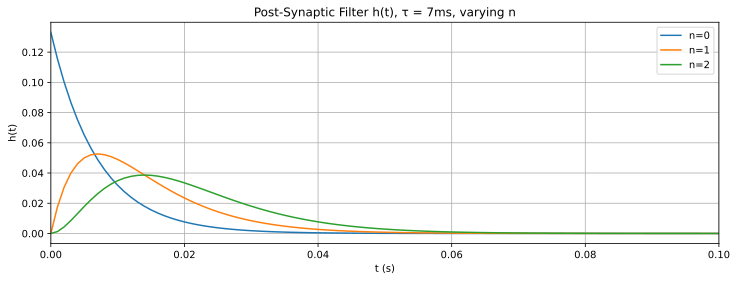

In [66]:
tau = 0.007

plt.figure(figsize=(12,4))
plt.title('Post-Synaptic Filter h(t), τ = 7ms, varying n')
plt.xlabel('t (s)')
plt.ylabel('h(t)')
plt.xlim([0, 0.1])

for n in [0, 1, 2]:
    h_t = h(t, n, tau)
    plt.plot(t, h_t, label=f'n={n}')

plt.grid(True)
plt.legend()
plt.show()

**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?


$n$ affects the overall shape of the filter. As $n$ increases, we get a broader distribution for $h$ in the time domain, which, as previously discussed, will correspond to a narrower distribution for $H$ in the frequency domain. This means that the more we increase $n$, the fewer high-frequency components we'll capture with our filter. So for constructing $\hat{x}(t)$, increasing $n$ will correspond to (1) more noise being smoothed out, but also (2) potentially capturing less of the original structure (i.e fine details and changes) of $x(t)$ since we discard more frequencies.


**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.


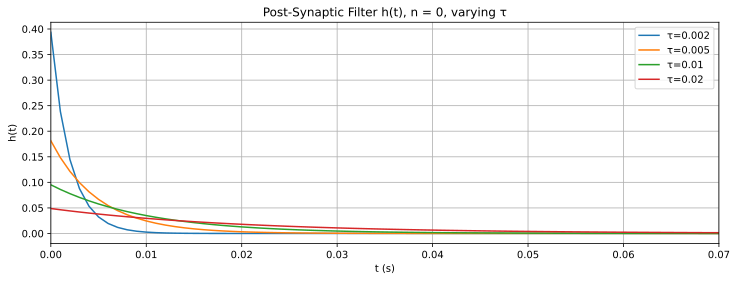

In [67]:
n = 0

plt.figure(figsize=(12,4))
plt.title('Post-Synaptic Filter h(t), n = 0, varying τ')
plt.xlabel('t (s)')
plt.ylabel('h(t)')
plt.xlim([0, 0.07])

for tau in [0.002, 0.005, 0.01, 0.02]:
    h_t = h(t, n, tau)
    plt.plot(t, h_t, label=f'τ={tau}')

plt.grid(True)
plt.legend()
plt.show()

**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?


$\tau$ affects the decay rate of the filter. The more we increase $\tau$, the longer $h(t)$ takes to decay to zero, so the filter covers a broader distribution in the time domain. Based on our previous logic, the more we stretch $h$ by increasing $\tau$, the more we narrow $H$. This corresponds to cutting out more high-frequency components, so the result on $\hat{x}(t)$ is (1) greater smoothing, and (2) potentially a loss in capturing finer details or higher frequencies from $x(t)$.

We can see that although they are similar, the effects of $\tau$ are more uniform and long-lasting than the effects of $n$.


**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.


(2000,)
(2000,)


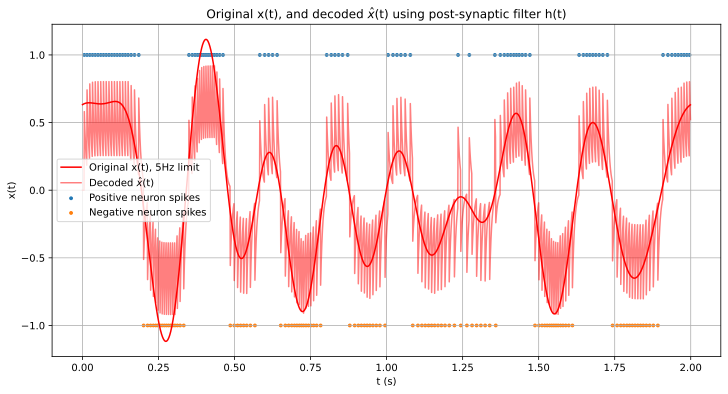

In [72]:
# Implement time-domain convolution
def convolve(r, h):
    spikes_convolve_h = np.zeros_like(r)

    # At each spike
    for t in range(len(r)):
        if r[t] != 0: 
            # Apply h(t) starting from each time t
            end_idx = min(t + len(h), len(spikes_convolve_h))
            spikes_convolve_h[t:end_idx] += r[t] * h[:end_idx - t]

    return spikes_convolve_h

# Re-generate spikes with 3c input:
x, X = generate_limit_signal(T, dt, rms=0.5, limit=5, seed=437856)

J_input_1 = J(t_ref, t_RC, a_0, a_1, e_1, x)
J_input_2 = J(t_ref, t_RC, a_0, a_1, e_2, x)

_, t_spikes_1, _ = dv_dt(T, dt, J_input_1, v_th, t_ref, t_RC)
_, t_spikes_2, _ = dv_dt(T, dt, J_input_2, v_th, t_ref, t_RC)

spikes = get_spike_trains(t, t_spikes_1, t_spikes_2)

# h(t)
h_t = h(t, n=0, tau=0.007)

# h(t) convolved with spikes from 3c
A = convolve(spikes[0] - spikes[1], h_t)
A = A.reshape(1, -1)

# Compute decoders
D = np.linalg.lstsq(A @ A.T, A @ x.T, rcond=None)[0].T

# Decode x_hat
x_hat = (D @ A).T

plt.figure(figsize=(12,6))
plt.title('Original x(t), and decoded $\hat{x}$(t) using post-synaptic filter h(t)')
plt.plot(ts, x, label="Original x(t), 5Hz limit", color='red')
plt.plot(ts, x_hat, label="Decoded $\hat{x}$(t)", color='red', alpha=0.5)
plt.scatter(ts[spikes[0] == 1], spikes[0][spikes[0] == 1], label='Positive neuron spikes', s=8)
plt.scatter(ts[spikes[1] == 1], -1 * spikes[1][spikes[1] == 1], label='Negative neuron spikes', s=8)
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.legend(loc='center left')
plt.grid(True)
plt.show()


**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.


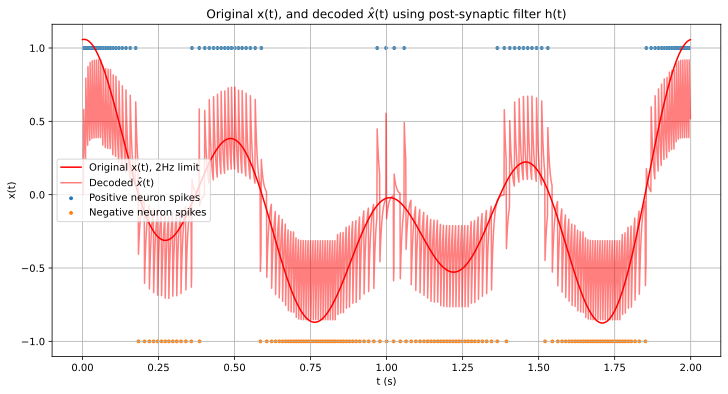

In [69]:
# Generate new spikes
x, X = generate_limit_signal(T, dt, rms=0.5, limit=2, seed=437856)

J_input_1 = J(t_ref, t_RC, a_0, a_1, e_1, x)
J_input_2 = J(t_ref, t_RC, a_0, a_1, e_2, x)

_, t_spikes_1, _ = dv_dt(T, dt, J_input_1, v_th, t_ref, t_RC)
_, t_spikes_2, _ = dv_dt(T, dt, J_input_2, v_th, t_ref, t_RC)

spikes = get_spike_trains(t, t_spikes_1, t_spikes_2)

# h(t) from previous, convolved with spikes
A = convolve(spikes[0] - spikes[1], h_t)
A = A.reshape(1, -1)

# x_hat computed with same decoders
x_hat = (D @ A).T

plt.figure(figsize=(12,6))
plt.title('Original x(t), and decoded $\hat{x}$(t) using post-synaptic filter h(t)')
plt.plot(ts, x, label="Original x(t), 2Hz limit", color='red')
plt.plot(ts, x_hat, label="Decoded $\hat{x}$(t)", color='red', alpha=0.5)
plt.scatter(ts[spikes[0] == 1], spikes[0][spikes[0] == 1], label='Positive neuron spikes', s=8)
plt.scatter(ts[spikes[1] == 1], -1 * spikes[1][spikes[1] == 1], label='Negative neuron spikes', s=8)
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

**g) Discussion.** How do the decodings from e) and f) compare? Explain.


Using the decoders obtained from 5Hz-limited $x(t)$ to decode $\hat{x}(t)$ for the 2Hz-limited input seems to have given very similar results in terms of overall shape and accuracy. This is because in our band-limited signals, the majority of the information is carried at low frequencies. The decoders are optimized to capture the most important information that dominates the input signal, so when we apply the 5Hz decoders to the 2Hz $x(t)$ input, they're still optimized to capture the low-frequency information that's most important for reconstructing $\hat{x}(t)$.
